# Burger equation

## Non conservative upwind scheme

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the domain
L = 10.0     # Domain length
nx = 101    # Number of grid points
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

# Define the initial condition
x0=5
u_initial = 10*np.exp(-(x-x0)**2)

# Define the time step and the final time
cf = 0.5
dt = cf*dx   # Time step
t_final = 0.5

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)

# Initialize the solution array
u_current = u_initial.copy()

#we create arrays where we will store the time and the l2norm
l2norm_NC=[]
l2norm_NC.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

time = np.arange(0.0, t_final + 2*dt, dt)

nx= 101
dx= 0.1
dt= 0.05
Number of iterations= 10.0


In [2]:
t_final_values = [t_final/10,t_final/2,t_final]
solutions_nc = []

print(time)

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55]


In [3]:
# Initilize time and iteration counter
t = 0.0
i = 0

# Solve the advection equation
while t < t_final:
    # Check if t is in t_final_values
    if any(abs(t - val) < dt for val in t_final_values):
        # Append the current solution to the solutions list
        solutions_nc.append(u_current.copy())

    # Compute the new solution using the Upwind method non conservative
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
    #       np.roll(u_current,  1) is equivalent to u(j-1)
    # using np.roll is equivalent to using periodic boundary conditions
    u_next = u_current - u_current*dt/dx*(np.roll(u_current, -1) - u_current)

    # Update the solution
    u_current = u_next.copy()

    # Advance the time
    i += 1
    t = time[i]

    # Compute the l2 norm and add the time to the time vector
    #l2norm_NC.append(np.sqrt(np.sum(u_current ** 2) / len(u_current)))

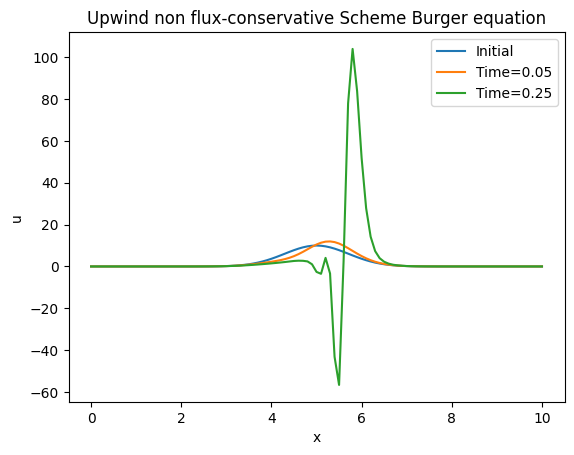

In [10]:
# Plot the final solution
plt.title('Upwind non flux-conservative Scheme Burger equation')
plt.plot(x, u_initial, label='Initial')

plt.plot(x, solutions_nc[0], label='Time=' + str(t_final_values[0]))
plt.plot(x, solutions_nc[1], label='Time=' + str(t_final_values[1]))
plt.plot(x, solutions_nc[2], label='Time=' + str(t_final_values[2]))

#plt.ylim(0, 1.1)
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.savefig('Burger FNC.png')
plt.show()

# Conservative form

In [5]:
# Initialize the solution array
u_current = u_initial.copy()

#we create arrays where we will store the time and the l2norm
l2norm_C=[]
l2norm_C.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

In [6]:
t_final_values = [t_final/10,t_final/2,t_final]
solutions_c = []

In [7]:
# Initilize time and iteration counter
t = 0.0
i = 0

# Solve the advection equation
while t < t_final:
    # Check if t is in t_final_values
    if any(abs(t - val) < dt for val in t_final_values):
        # Append the current solution to the solutions list
        solutions_c.append(u_current.copy())
        
    # Compute the new solution using the Upwind method conservative
    # Note: np.roll(u_current, -1) is equivalent to u(j+1) and
    #       np.roll(u_current,  1) is equivalent to u(j-1)
    # using np.roll is equivalent to use periodic boundary conditions
    
    u_next = u_current - dt/dx * (0.5*np.roll(u_current, -1)**2 - 0.5*u_current**2)

    # Update the solution
    u_current = u_next.copy()
    
    
    # Advance the time
    i += 1
    t = time[i]
    
    #compute the l2 norm and add the time to the time vector
    l2norm_C.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

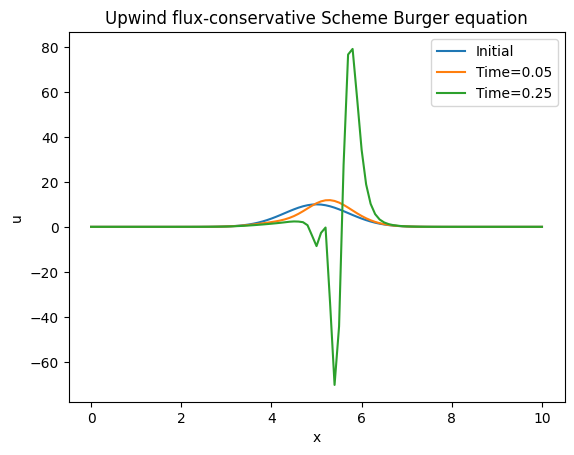

In [9]:
plt.close()

# Plot the final solution
plt.title('Upwind flux-conservative Scheme Burger equation')
plt.plot(x, u_initial, label='Initial')

plt.plot(x, solutions_c[0], label='Time=' + str(t_final_values[0]))
plt.plot(x, solutions_c[1], label='Time=' + str(t_final_values[1]))
plt.plot(x, solutions_c[2], label='Time=' + str(t_final_values[2]))

#plt.ylim(0, 1.1)
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.savefig('Burger FC.png')
plt.show()

# Nuovo tentativo

In [11]:
# Define the domain
L = 10.0     # Domain length
nx = 101    # Number of grid points
dx = L/(nx-1)   # Grid spacing
x = np.linspace(0, L, nx)

# Define the initial condition
x0=5
u_initial = 10*np.exp(-(x-x0)**2)

# Define the time step and the final time
cf = 0.5
dt = cf*dx # Time step
t_final = 0.5

print('nx=',nx)
print('dx=',dx)
print('dt=',dt)
print('Number of iterations=',t_final/dt)

# Initialize the solution array
u_current = u_initial.copy()

#we create arrays where we will store the time and the l2norm
l2norm_NC=[]
l2norm_NC.append(np.sqrt(np.sum(u_current**2)/len(u_current)))

nx= 101
dx= 0.1
dt= 0.05
Number of iterations= 10.0


In [15]:
def evolve_conservative(u_current) :
    u_next = np.zeros(nx)
    for j in range (len(u_current)):
        u_next[j] = u_current[j] -  dt / dx * (0.5* u_current[j%len(u_current)]**2 -  0.5*u_current[(j-1)%len(u_current)]**2)
    u_current = u_next
    return u_current

In [17]:
conservative = []

time = 0.5
t = 0
i  = 0

while t <= time :
    u_current = evolve_conservative(u_current)
    t = t + dt
    i = i +1 
conservative.append(u_current)

/var/folders/bn/dxj8hlps2pg80dtyf5qjb_340000gn/T/ipykernel_3515/104969623.py:4: RuntimeWarning: overflow encountered in scalar power
  u_next[j] = u_current[j] -  dt / dx * (0.5* u_current[j%len(u_current)]**2 -  0.5*u_current[(j-1)%len(u_current)]**2)
/var/folders/bn/dxj8hlps2pg80dtyf5qjb_340000gn/T/ipykernel_3515/104969623.py:4: RuntimeWarning: invalid value encountered in scalar subtract
  u_next[j] = u_current[j] -  dt / dx * (0.5* u_current[j%len(u_current)]**2 -  0.5*u_current[(j-1)%len(u_current)]**2)


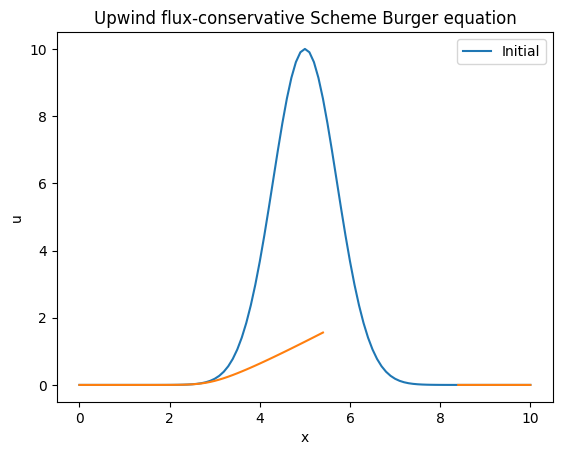

In [18]:
# Plot the final solution
plt.title('Upwind flux-conservative Scheme Burger equation')
plt.plot(x, u_initial, label='Initial')

plt.plot(x, u_current)

#plt.ylim(0, 1.1)
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
#plt.savefig('Burger FC.png')
plt.show()